In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


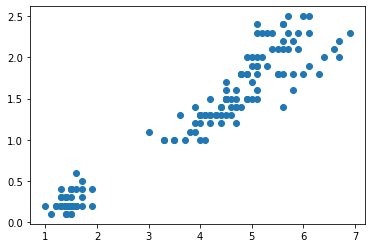

In [33]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']] = scaler.transform(df[['petal length (cm)']])

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.2
1,4.9,3.0,0.067797,0.2
2,4.7,3.2,0.050847,0.2
3,4.6,3.1,0.084746,0.2
4,5.0,3.6,0.067797,0.2


In [37]:
scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,0.067797,0.041667
1,4.9,3.0,0.067797,0.041667
2,4.7,3.2,0.050847,0.041667
3,4.6,3.1,0.084746,0.041667
4,5.0,3.6,0.067797,0.041667


In [39]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis=1, inplace =True)

In [40]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [41]:
from sklearn.cluster import KMeans

In [42]:
Cluster_Centres = [[]]
SSE = []

In [43]:
for i in range(1,12):
  km = KMeans(n_clusters = i)
  km.fit_predict(df[['petal length (cm)']],df['petal width (cm)'])
  Cluster_Centres.append(km.cluster_centers_)
  SSE.append(km.inertia_)

In [44]:
Cluster_Centres

[[], array([[0.46745763]]), array([[0.08341642],
        [0.66529704]]), array([[0.78445099],
        [0.07830508],
        [0.55775267]]), array([[0.07830508],
        [0.64557439],
        [0.83107345],
        [0.48881356]]), array([[0.63828028],
        [0.07830508],
        [0.90755008],
        [0.48881356],
        [0.7752395 ]]), array([[0.80155367],
        [0.07830508],
        [0.47011597],
        [0.58865711],
        [0.68135593],
        [0.94915254]]), array([[0.07830508],
        [0.80155367],
        [0.51977401],
        [0.68845843],
        [0.94915254],
        [0.60805085],
        [0.40920097]]), array([[0.7748184 ],
        [0.07830508],
        [0.51977401],
        [0.60805085],
        [0.84437596],
        [0.40920097],
        [0.95932203],
        [0.68845843]]), array([[0.51977401],
        [0.09973924],
        [0.83898305],
        [0.68845843],
        [0.40920097],
        [0.94915254],
        [0.60805085],
        [0.7748184 ],
        [0.05508475]

In [45]:
SSE

[13.33885090491238,
 1.9420778923288335,
 0.7042927675936684,
 0.361318905806122,
 0.24979074045707844,
 0.16993333193767124,
 0.12271555792670409,
 0.09879575705344157,
 0.07381370664191692,
 0.05938922932180447,
 0.05239017122181189]

In [46]:
df['flower_type'] = iris.target

In [47]:
df.head()

,petal length (cm),petal width (cm),flower_type
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


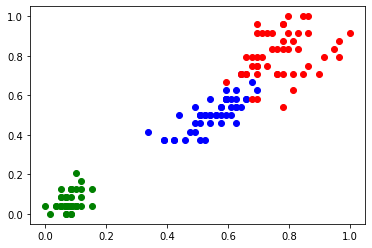

In [48]:
df1 = df[df.flower_type==0]
df2 = df[df.flower_type==1]
df3 = df[df.flower_type==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'red')

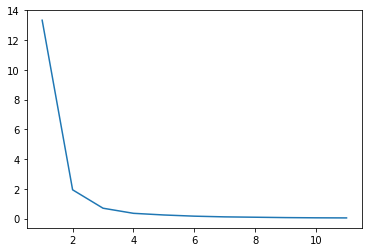

In [49]:
cluster = range(1,12)
plt.plot(cluster,SSE)

#The perfect value for n_clusters = 3 as in the plot above we can see elbow at that point.